# Filter Networks #

### Approach ###

Analysing simple RC networks for the purpose of producing phase shifts of sine waves which in turn might be useful later for producing oscillatory networks.

In [152]:
from IPython.display import Image
from sympy import Matrix, symbols, Symbol, init_printing, Function, dsolve, checkodesol, sin, cos,exp, pi, Eq, \
    solveset, collect, cancel, simplify, lambdify, acos, atan, sqrt, I, integrate, factor, factor_list, Matrix, expand, \
    conjugate, Rational, sympify
import sympy
import matplotlib.pyplot as plt
from scipy.signal import  find_peaks
from scipy.integrate import solve_ivp
import numpy as np
from sympy.abc import phi
from functools import reduce
init_printing()

In [153]:
from IPython.display import display
from sympy import Function, Equality, Mul, Add

In [154]:
from system_eqns import systemEqns
import sympy 
sympy.__version__

'1.13.1'

## The simplest RC network

A network containing only one capacitor and resistor

In [155]:
Image(url='https://images.kiwiheretic.xyz/RC-filter0.jpg', width=600)

This is the simplest RC filter I can think of.  It only contains one current path for $ \textit{i} $.

Therefore:

$$ V_{in} = V_c + R \textit{i} $$

However $ \textit{i} = C \frac{d V_c}{dt} $ and we want to think about the case where $ V_{in} = A \sin( 2 \pi f t) $ and so we have:

$$ A \sin (2 \pi f t ) = V_c(t) + R C \frac{d V_c}{dt} $$


In [156]:
Vin, Vc, C, R, i, t, f, A, tau, w = symbols("V_{in} V_c C R i t f A tau omega", real=True, positive=True)
Vin, Vc, C, R, i, t, f, A, tau, w

In [157]:
def multiplyIt(x, y):
    return sympify(x)*sympify(y)

In [158]:
def getSym(expr, symbolName):
    for sym in expr.free_symbols:
        if sym.name == symbolName:
            return sym
    return None

In [159]:
# Define the voltage across the capacitor as a function of time
VC = Function("V_c")

In [160]:
# Define "driving term" of the differential equation
dt =A*cos(2*pi*f*t)

In [161]:
# Present the differential equation of the circuit
eqn1 = Eq(dt , VC(t) + R * C * VC(t).diff(t))
eqn1

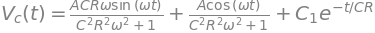

In [162]:
# Solve for the voltage across the capacitor wrt time
dsoln = dsolve(eqn1, VC(t)).subs(2*pi*f, w)
dsoln

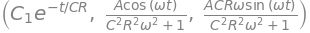

In [163]:
terms = dsoln.args[1].args
terms

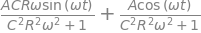

In [164]:
nonTransient = sum(terms[1:])
nonTransient

### Find value for $ C_1 $
At this point we want to find $ C_1 $ by setting $ V_c(0) = 0 $.  This seems reasonable that the capacitor starts off with no charge on it.

In [165]:
c1 = Symbol('C1')

In [166]:
c1 in dsoln.free_symbols

True

In [167]:
# Solve for C1
c1eq = solveset(dsoln.subs([(t,0)]), c1).args[0]; c1eq

In [168]:
# We will assume VC = 0 at t = 0.  No charge on capacitor at start. 
c1eq.args[0]

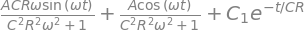

In [169]:
eqn1 = dsoln.rhs; eqn1

At this point I am going to try and ignore the transient part of the solution

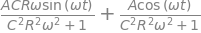

In [170]:
nonTransient

### Computation of phase and magnitude 

We might like to find out the amplitude and phase of the above formula given that it has both a sin and cosine term in it.  The result will be a superposition which will have a different amplitude and phase of any of them separately.  

If we remember that for $ C_1 \sin( \theta ) + C_2 \cos (\theta) = C_3 * \cos ( \theta + \alpha ) $.  The constants $ C_1, C_2 \mathrm{and} C_3 $ have nothing to do with the constant of integration $ C_1 $ mentioned above.  It is simply because I am running out of meaningful variable names.

Then:

$$ C_3^2 = C_1^2 + C_2^2 $$

and

we can try to reduce this formula:

$$ C_1 \sin( \theta ) + C_2 \cos (\theta) = C_3 * \cos ( \theta + \alpha ) $$
$$ \Rightarrow C_1 \sin( \theta ) + C_2 \cos (\theta) = C_3 * \cos ( \theta ) \cos  (\alpha ) - C_3 * \sin ( \theta ) \sin  (\alpha )  $$
$$ \Rightarrow C_1  =  C_3 * \sin  (\alpha ) \textrm{ and } C_2  =  C_3 * \cos  (\alpha ) $$
$$ \Rightarrow \tan( \alpha ) = C_1 / C_2 $$
$$ \Rightarrow \tan^2( \alpha ) = C_1^2 / C_2^2 $$
$$ \Rightarrow \tan^2( \alpha ) + 1 = C_1^2 / C_2^2 + C_2^2/C_2^2 =\frac{C_1^2 + C_2^2}{C_2^2} $$
$$ \Rightarrow \cos^2( \alpha ) = \frac{C_2^2}{C_1^2 + C_2^2}  $$
$$ \Rightarrow \alpha = \cos^{-1} \left( \sqrt {\frac{ C_2^2 } { C_1^2 + C_2^2 }} \right)  $$

### Compute V_out 

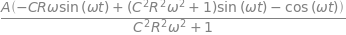

In [171]:
# Find the voltage at the output
vout = simplify(A * sin(w*t) - nonTransient)
vout

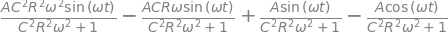

In [172]:
vrsterms = expand(vout)
vrsterms

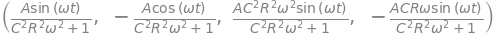

In [173]:
vrstermslist = vrsterms.args
vrstermslist

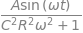

In [174]:
# Get cosine coefficient
coscf = reduce(multiplyIt, (filter(lambda x:type(x) not in [cos],vrstermslist[0].args)))
coscf

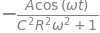

In [175]:
# Get cosine coefficient
sincf = reduce(multiplyIt, (filter(lambda x:type(x) not in [sin],vrstermslist[1].args)))
sincf

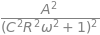

In [176]:
c3_2 = simplify(sincf**2 + coscf**2)
c3_2

In [177]:
# Now compute the phase shift at the output
alpha = atan(sincf/coscf)
alpha

This results in a phase shift angle of $ \alpha - \frac { \pi }{2} $

### Find magnitude of voltage across $ V_c $ and phase shift ###

The phase shift is in relation to the input voltage and I am not even sure that is quite right.  I have to check if this is valid for a sin(w*t) driving force as 
opposed to cos(w*t)

We do this initially by comparing the coefficients of the sin and cos terms but later on we have at doing this
using complex analysis.

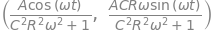

In [178]:
nonTransient.args

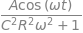

In [179]:
# Get sine coefficient
sincf = reduce(multiplyIt, (filter(lambda x:type(x) not in [sin],nonTransient.args[0].args)))
sincf

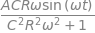

In [180]:
# Get cosine coefficient
coscf = reduce(multiplyIt, (filter(lambda x:type(x) not in [cos],nonTransient.args[1].args)))
coscf

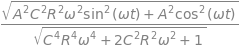

In [181]:
c3 = sqrt(cancel(sincf**2 + coscf**2))
c3

In [182]:
from sympy import Mul, sympify, re, im
import math 

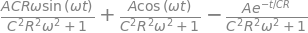

In [183]:
simpeq2 = dsoln.args[1].subs(c1, c1eq.args[0])
simpeq2

In [184]:
type(simpeq2.args[0].args[-1])

cos

In [185]:
simpeq2.coeff(simpeq2.args[0].args[-1])

In [186]:
u = symbols('u')

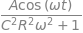

In [187]:
simpeq2.args[0]

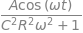

In [188]:
# Get sine coefficient
c1 = reduce(multiplyIt, (filter(lambda x:type(x) not in [sin],simpeq2.args[0].args)))
c1

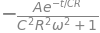

In [189]:
# Get cosine coefficient
c2 = reduce(multiplyIt, (list(filter(lambda x:type(x) not in [cos],simpeq2.args[1].args))))
c2

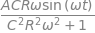

In [190]:
# Get third coefficient (of exponential term)
reduce(multiplyIt, filter(lambda x:type(x) not in [ exp],simpeq2.args[2].args))

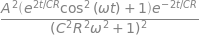

In [191]:
# Compute c3^2 using pythagoras theorem
c3_2 = simplify(c1**2 + c2**2)
c3_2

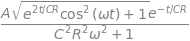

In [192]:
# find c3 by taking square root
c3 = sqrt(c3_2) 
c3


In [193]:
# Compute the phase
c1/c2

The tan function can be equated to the fraction of $ \frac{\sin( \theta )}{\cos (\theta )}$ 

In [194]:
simplify(atan(c1/c2))

### Complex Impedance Analysis 

I wish to compare this with the complex analysis of the circuit

In [195]:
Z = R - I / (w*C)
zc = cancel(Z)  # express as fraction
zc

In [196]:
# Now we try and work out Vout as R/Z
rzc = (-I/(w*C))/zc
rzc

In [197]:
sympy.re(rzc)

In [198]:
sympy.im(rzc)

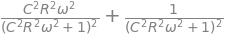

In [199]:
sympy.re(rzc)**2 + sympy.im(rzc)**2

In [200]:
# This is the square of the magnitude of voltage dividing impedance across R
c3_2 = cancel(_)
c3_2

In [201]:
phase = atan(sympy.im(rzc)/sympy.re(rzc))
phase

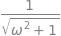

In [202]:
u = sqrt(c3_2).subs([(A,1), (C,1), (R,1)])
u

In [203]:
f1 = lambdify(w, u)

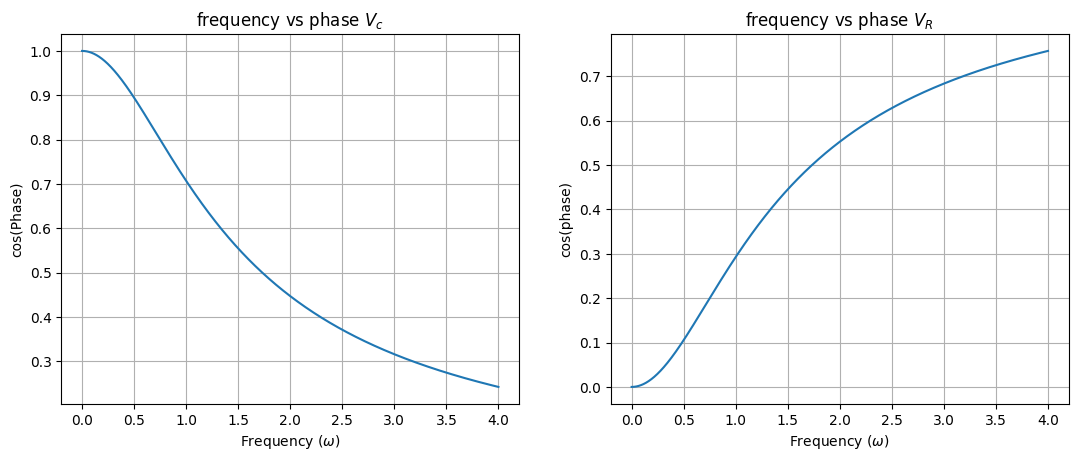

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(13)

f1 = lambdify(w, u)
t1 = np.linspace(0, 4, 8000)
y = f1(t1)
y2 = 1 - y

ax1.title.set_text("frequency vs phase $V_c$")
ax1.set_xlabel("Frequency ($ \omega $)")
ax1.set_ylabel("cos(Phase)")
ax1.plot(t1, y)
ax1.grid()


ax2.title.set_text("frequency vs phase $V_R$")
ax2.set_xlabel("Frequency ($ \omega $)")
ax2.set_ylabel("cos(phase)")
ax2.plot(t1, y2)
ax2.grid()

plt.show()


In [205]:
w = getSym(simpeq2, "omega")
w

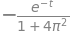

In [206]:
expdropoff = simpeq2.args[1].subs([(C*R, 1), (A,1), (f,1), (w, 2*pi)])
expdropoff

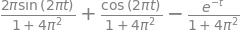

In [207]:
fn = simpeq2.subs([(C*R, 1), (A,1), (f,1), (w, 2*pi)])
fn

In [208]:
f1 = lambdify(t, fn)
f3 = lambdify(t, expdropoff)
t1 = np.linspace(0, 10, 4000)
y2 = np.sin(2*np.pi*t1)
y = f1(t1)
pks = find_peaks(y)[0]
pks

array([  91,  490,  890, 1290, 1690, 2089, 2489, 2889, 3289, 3689])

In [209]:
[(t1[ii],y[ii]) for ii in pks]

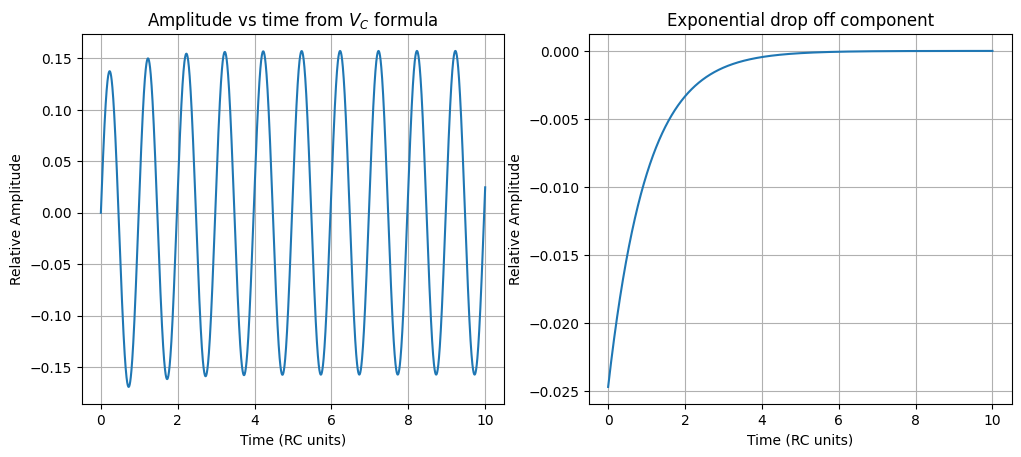

In [210]:
fig, (ax1, ax3) = plt.subplots(1,2)
fig.set_figwidth(12)

f1 = lambdify(t, fn)
f3 = lambdify(t, expdropoff.subs(w, 2*pi))
t1 = np.linspace(0, 10, 4000)
y2 = np.sin(2*np.pi*t1)
y = f1(t1)

ax1.title.set_text("Amplitude vs time from $ V_C $ formula")
ax1.set_xlabel("Time (RC units)")
ax1.set_ylabel("Relative Amplitude")
ax1.plot(t1, y)
ax1.grid()


t1 = np.linspace(0, 10, 4000)
y = f3(t1)

ax3.title.set_text("Exponential drop off component")
ax3.set_xlabel("Time (RC units)")
ax3.set_ylabel("Relative Amplitude")
ax3.plot(t1, y)
ax3.grid()
plt.show()


In [211]:
find_peaks(y)

(array([], dtype=int64), {})

## Two RC Filter Network

In [212]:

Image(url='https://images.kiwiheretic.xyz/RC-filter1.jpg', width=400)

I am assuming that the voltage in the direction of conventional current produces a positive voltage above ground.
That means $ R_1 ( i_2 - i_1) $ is considered to be a positive voltage above ground because the current is flowing to ground.  However the same must be true of $ R_2 i_2 $ if we look at $ R_1 ( i_2 - i_1) $ being the voltage source of the last stage.

There are two equations:

$$ V_{in} = V_{C1} + R_1 (i_1 - i_2) $$
$$ R_1 ( i_2 - i_1) = V_{C2} + R_2 i_2 $$

These can be rearranged so that all the i's are on the right and everything else on the left.

$$ V_{in} - V_{C1} = R_1 i_1 - R_1 i_2) $$
$$  V_{C2} = R_1 ( i_2 - i_1) -  R_2 i_2 = (R_1 - R_2) i_2 - R_1 i_1 $$


In matrix form this looks like:

$$ \begin{pmatrix}
V_{in} - V_{C1} \\ V_{C2}
\end{pmatrix} 
=
\begin{pmatrix}
R_1 & -R_1  \\
-R_1 & R_1 - R_2 \\
\end{pmatrix}
\begin{pmatrix}
i_1 \\ i_2
\end{pmatrix} $$

In [213]:
A_0, A_1, A_2, B_1, B_2, R1, R2, R3, Vin, C1, C2 = symbols("A_0 A_1 A_2 B_1 B_2 R_1 R_2 R_3 V_{in} C_1 C_2")
Vc1 = Function('Vc1')
Vc2 = Function('Vc2')
Vc3 = Function('Vc3')
R1,R2, Vin, Vc1, Vc2, C1,C2

(R_1, R_2, V_{in}, Vc1, Vc2, C_1, C_2)

In [214]:
m = Matrix([[R1, -R1], [-R1, R1-R2]]); m

⎡R₁     -R₁  ⎤
⎢            ⎥
⎣-R₁  R₁ - R₂⎦

In [215]:
v = Matrix([Vin-Vc1(t), Vc2(t)]);v

⎡V_{in} - Vc₁(t)⎤
⎢               ⎥
⎣    Vc₂(t)     ⎦

In [216]:
m.inv()

⎡-R₁ + R₂  -1 ⎤
⎢────────  ───⎥
⎢ R₁⋅R₂    R₂ ⎥
⎢             ⎥
⎢  -1      -1 ⎥
⎢  ───     ───⎥
⎣  R₂      R₂ ⎦

In [217]:
mtmp = m.inv()*v
mtmp

⎡  Vc₂(t)   (-R₁ + R₂)⋅(V_{in} - Vc₁(t))⎤
⎢- ────── + ────────────────────────────⎥
⎢    R₂                R₁⋅R₂            ⎥
⎢                                       ⎥
⎢        V_{in} - Vc₁(t)   Vc₂(t)       ⎥
⎢      - ─────────────── - ──────       ⎥
⎣              R₂            R₂         ⎦

In [218]:
eqn_1 = Eq(C1 * Vc1(t).diff()/C, mtmp[0]/C)
eqn1 = eqn_1.subs([(R1, R), (R2, R), (C1,C)])
eqn1

In [219]:
Vc2(t).diff()

In [220]:
eqn_2 = Eq(Vc2(t).diff(), simplify(mtmp[1]/C))
eqn2 = eqn_2.subs([(R1, R), (R2, R)])
eqn2

In [221]:
eqn1

In [222]:
type(eqn2.rhs)

sympy.core.mul.Mul

In [223]:
type(expand(eqn2.rhs))

sympy.core.add.Add

In [224]:
isinstance(eqn1, sympy.Equality)

True

In [225]:
type(eqn1.lhs)

sympy.core.function.Derivative

In [226]:
isinstance(eqn1.lhs.args[0], sympy.Function)

True

In [227]:
def fn1(t, y, R, C, f):
    """ y is an array of size 2"""
    #print (t,y,R,C,f)
    yp1 = (-y[1]) / (C*R)
    yp2 = (y[0] - y[1] - math.sin(2 * math.pi * f * t))/(C*R)
    return [ yp1, yp2 ]


In [228]:
fn1(0.0001, [0,0], 1000, 0.00001, 1)

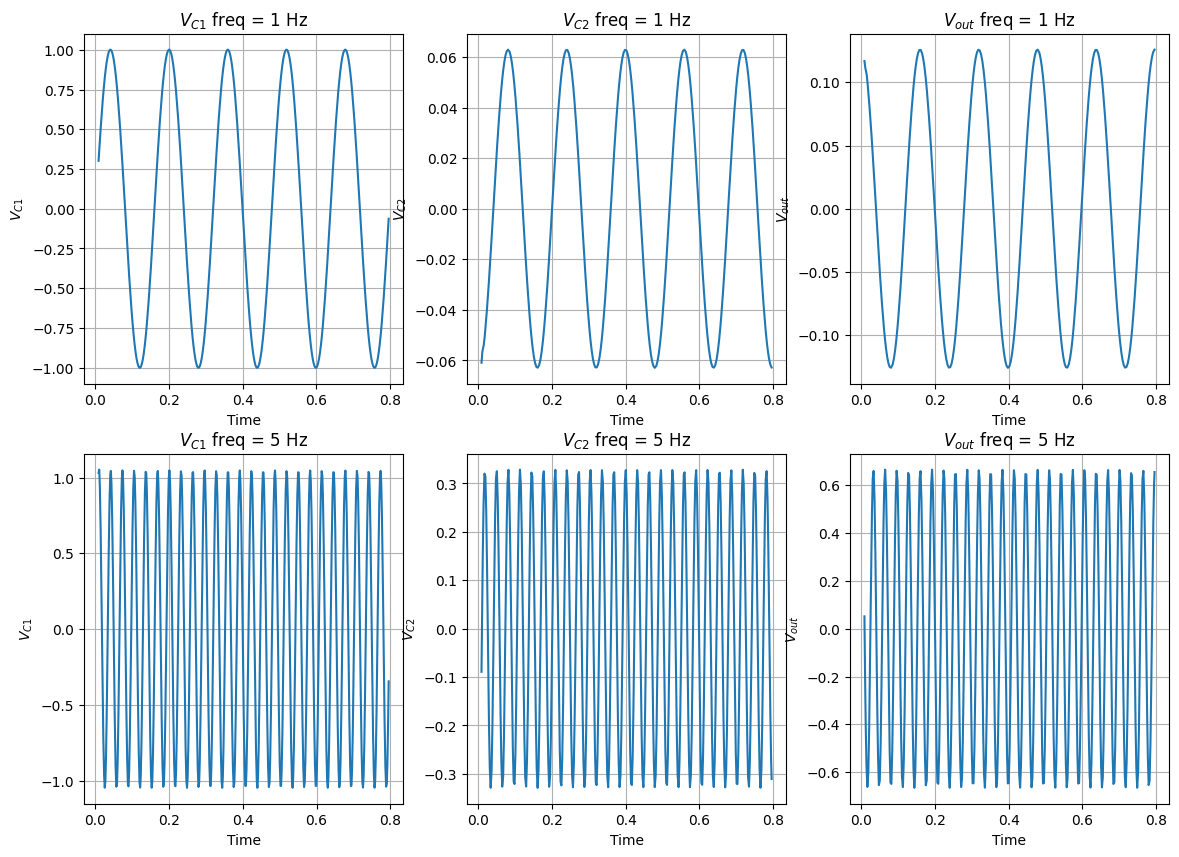

In [229]:
fig, axs = plt.subplots(2,3)
fig.set_figwidth(14)
fig.set_figheight(10)

farr = [1,5]

start_idx = 8
for ax1, ax2, ax3 in axs:
    freq = farr.pop(0)
    res = solve_ivp(fn1, [0,5], [0,0], 'RK45', args = (1000,0.00001,freq), first_step=0.0001)
    ax1.title.set_text("$V_{{C1}} $ freq = {} Hz".format(freq))
    ax1.set_ylabel("$V_{C1}$")
    ax1.set_xlabel("Time")
    ax1.plot(res.t[start_idx:]/(math.pi*2), res.y[0][start_idx:])
    ax1.grid()

    ax2.title.set_text("$V_{{C2}} $ freq = {} Hz".format(freq))
    ax2.set_ylabel("$V_{C2}$")
    ax2.set_xlabel("Time")
    ax2.plot(res.t[start_idx:]/(math.pi*2), res.y[1][start_idx:])
    ax2.grid()
    
    vr1 = np.sin(2 * math.pi * freq * res.t) - res.y[0] - res.y[1]
    ax3.title.set_text("$V_{{out}} $ freq = {} Hz".format(freq))
    ax3.set_ylabel("$V_{out}$")
    ax3.set_xlabel("Time")
    ax3.plot(res.t[start_idx:]/(math.pi*2), vr1[start_idx:])
    ax3.grid()

plt.show()


In [230]:
eqn1

In [231]:
eqn2

In [232]:
sysEqns = systemEqns()

res1 = sysEqns.extractCoeffsFromDiffEqn(eqn1)
print (res1)
res2 = sysEqns.extractCoeffsFromDiffEqn(eqn2)
print (res2)
print (sysEqns.symbols_used)


[(a_2*omega, -a_1*omega), (a_3/(C*R), a_4/(C*R))]
[(a_4*omega, -a_3*omega), (-a_1/(C*R), -a_2/(C*R)), (a_5/(C*R), a_6/(C*R)), (a_3/(C*R), a_4/(C*R))]
[a_1, a_2, a_3, a_4, a_5, a_6]


In [233]:
M, syms_used = sysEqns.orderedMatrix([res1, res2])
display(M)

⎡                1           ⎤
⎢-ω    0    0   ───   0    0 ⎥
⎢               C⋅R          ⎥
⎢                            ⎥
⎢           1                ⎥
⎢ 0    ω   ───   0    0    0 ⎥
⎢          C⋅R               ⎥
⎢                            ⎥
⎢     -1         1         1 ⎥
⎢ 0   ───  -ω   ───   0   ───⎥
⎢     C⋅R       C⋅R       C⋅R⎥
⎢                            ⎥
⎢-1         1         1      ⎥
⎢───   0   ───   ω   ───   0 ⎥
⎣C⋅R       C⋅R       C⋅R     ⎦

In [234]:
syms_used

The rows of M1 are in order of a1, a2, a3, a4

In [235]:
M1 = M[:4,:4]
display(M1)

⎡                1 ⎤
⎢-ω    0    0   ───⎥
⎢               C⋅R⎥
⎢                  ⎥
⎢           1      ⎥
⎢ 0    ω   ───   0 ⎥
⎢          C⋅R     ⎥
⎢                  ⎥
⎢     -1         1 ⎥
⎢ 0   ───  -ω   ───⎥
⎢     C⋅R       C⋅R⎥
⎢                  ⎥
⎢-1         1      ⎥
⎢───   0   ───   ω ⎥
⎣C⋅R       C⋅R     ⎦

In [236]:
A,B,D,E,F,G,H,  w = symbols('A B D E F G H \omega')

In [237]:
amat = Matrix([0,0, 0,-A/(C*R)])
amat

⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢-A ⎥
⎢───⎥
⎣C⋅R⎦

In [238]:
coeffs = M1**-1 * amat
coeffs

⎡       ⎛ 3  3  2      ⎞      ⎤
⎢    -A⋅⎝C ⋅R ⋅ω  - C⋅R⎠      ⎥
⎢─────────────────────────────⎥
⎢    ⎛ 4  4  4    2  2  2    ⎞⎥
⎢C⋅R⋅⎝C ⋅R ⋅ω  - C ⋅R ⋅ω  + 1⎠⎥
⎢                             ⎥
⎢           A⋅C⋅R⋅ω           ⎥
⎢   ───────────────────────   ⎥
⎢    4  4  4    2  2  2       ⎥
⎢   C ⋅R ⋅ω  - C ⋅R ⋅ω  + 1   ⎥
⎢                             ⎥
⎢            2  2  2          ⎥
⎢        -A⋅C ⋅R ⋅ω           ⎥
⎢   ───────────────────────   ⎥
⎢    4  4  4    2  2  2       ⎥
⎢   C ⋅R ⋅ω  - C ⋅R ⋅ω  + 1   ⎥
⎢                             ⎥
⎢     ⎛ 4  4  3    2  2  ⎞    ⎥
⎢  -A⋅⎝C ⋅R ⋅ω  - C ⋅R ⋅ω⎠    ⎥
⎢─────────────────────────────⎥
⎢    ⎛ 4  4  4    2  2  2    ⎞⎥
⎣C⋅R⋅⎝C ⋅R ⋅ω  - C ⋅R ⋅ω  + 1⎠⎦

In [239]:
d,b,f,e = coeffs

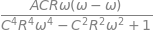

In [240]:
# Do a sanity check - should equal zero
simplify(b*w+f/(C*R))

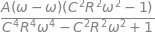

In [241]:
simplify(e/(C*R)-d*w)

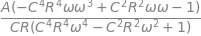

In [242]:
# This reduces to -A/(C*R) but simplify doesn't do much of a job of reducing it.  If you look carefully you can see why.
simplify(e*w-(d-f)/(C*R))

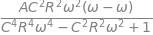

In [243]:
simplify((e-b)/(C*R)-f*w)

This is a little bit at variance with the results downstairs but not by much.  It indicates that I may have a sign issue somewhere.

In [244]:
vc2 = E*sin(w*t)+F*cos(w*t)
vc2

In [245]:
vc1 = B*sin(w*t)+D*cos(w*t)
vc1

In [246]:
eq1 = eqn1.subs([(Vc1(t), vc1), (Vc2(t), vc2)])
eq1

In [247]:
eq2 = eqn2.subs([(Vc1(t), vc1), (Vc2(t), vc2), (Vin, A*sin(w*t))])
eq2

In [248]:
eq1.lhs.doit()

In [249]:
eq2.lhs.doit()

In [250]:
eq2.rhs.args[2].args

Afte cancelling for sines and cosines we end up with the following equations:

$$ F + B \omega C R = 0 $$
$$ E - D \omega C R = 0 $$
$$ E \omega C R - D + F = 0 $$
$$ E - B - F \omega C R = -A $$

In [251]:
eqn1

In [252]:
isinstance(eqn1, Equality)

True

In [253]:
if isinstance(eqn1, Equality):
    eq = eqn1.lhs - eqn1.rhs
else:
    eq = eqn1



In [254]:
ii = 1
for eqn in [eqn1, eqn2]:
    sym1, sym2 = symbols('a_{} a_{}'.format(ii, ii+1))
    vc = sym1*cos(w * t) + sym2 * sin(w*t)
    eq = eqn.subs([])
    
    #display ([sym1, sym2])
    ii += 2
    

In [255]:
m = Matrix([[w*C*R, 0, 0, 1], [0, -w*C*R, 1, 0], [0, -1, w*C*R, 1], [-1,0, 1, -w*C*R]])
m

⎡C⋅R⋅\omega       0           0            1     ⎤
⎢                                                ⎥
⎢    0       -C⋅R⋅\omega      1            0     ⎥
⎢                                                ⎥
⎢    0           -1       C⋅R⋅\omega       1     ⎥
⎢                                                ⎥
⎣    -1           0           1       -C⋅R⋅\omega⎦

In [256]:
minv = m**-1
minv

⎡           3  3       3                                                       ↪
⎢          C ⋅R ⋅\omega                             1                          ↪
⎢─────────────────────────────────  ─────────────────────────────────  ─────── ↪
⎢ 4  4       4    2  2       2       4  4       4    2  2       2       4  4   ↪
⎢C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1  C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1  C ⋅R ⋅\ ↪
⎢                                                                              ↪
⎢                                              3  3       3                    ↪
⎢                1                           -C ⋅R ⋅\omega                     ↪
⎢─────────────────────────────────  ─────────────────────────────────  ─────── ↪
⎢ 4  4       4    2  2       2       4  4       4    2  2       2       4  4   ↪
⎢C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1  C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1  C ⋅R ⋅\ ↪
⎢                                                                              ↪
⎢                           

In [257]:
amat = Matrix([0,0,0,-A])
amat

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣-A⎦

In [258]:
# Find the coefficients of B,D,E and F.
coeffs = minv*amat
coeffs

⎡        ⎛ 2  2       2    ⎞       ⎤
⎢     -A⋅⎝C ⋅R ⋅\omega  - 1⎠       ⎥
⎢───────────────────────────────── ⎥
⎢ 4  4       4    2  2       2     ⎥
⎢C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1 ⎥
⎢                                  ⎥
⎢         -A⋅C⋅R⋅\omega            ⎥
⎢───────────────────────────────── ⎥
⎢ 4  4       4    2  2       2     ⎥
⎢C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1 ⎥
⎢                                  ⎥
⎢            2  2       2          ⎥
⎢        -A⋅C ⋅R ⋅\omega           ⎥
⎢───────────────────────────────── ⎥
⎢ 4  4       4    2  2       2     ⎥
⎢C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1 ⎥
⎢                                  ⎥
⎢   ⎛   3  3       3             ⎞ ⎥
⎢-A⋅⎝- C ⋅R ⋅\omega  + C⋅R⋅\omega⎠ ⎥
⎢──────────────────────────────────⎥
⎢ 4  4       4    2  2       2     ⎥
⎣C ⋅R ⋅\omega  - C ⋅R ⋅\omega  + 1 ⎦

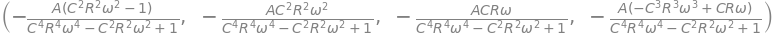

In [259]:
b = coeffs[0]
d = coeffs[1]
e = coeffs[2]
f = coeffs[3]
b, e, d, f

In [260]:
simplify(f + b * w* C* R)

In [261]:
eq = eq1.subs([(B,b), (D,d), (E,e), (F,f)]).doit()
simplify(eq.lhs - eq.rhs)

In [262]:
eq = eq2.subs([(B,b), (D,d), (E,e), (F,f)]).doit()
simplify(eq.lhs - eq.rhs)

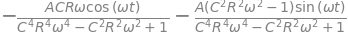

In [263]:
vc1.subs([(B,b),(D,d)])

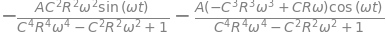

In [264]:
vc2.subs([(E,e), (F,f)])

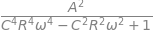

In [265]:
# Compute the magnitude of Vc1
simplify(b**2+d**2)

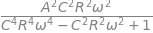

In [266]:
# Compute the magnitude of Vc2
(simplify(e**2+f**2))

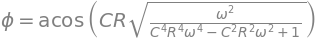

In [267]:
# Now compute phase of Vc1
Eq(phi, acos(sqrt(simplify(d**2/(b**2+d**2)))))

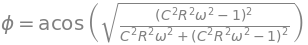

In [268]:
# Now compute phase of Vc2
Eq(phi, acos(sqrt(simplify(f**2/(e**2+f**2)))))

In [269]:
# I am have a bit of a guess here at computing  tan (phi)
d/b

### Compute V_R

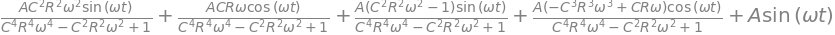

In [270]:
vr = A*sin(w*t) - b* sin(w*t) - d*cos(w*t) - e*sin(w*t) - f*cos(w*t)
vr

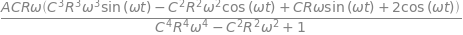

In [271]:
simplify(vr)

## Larger (x 3) RC Network 
Now try the same thing with three lots of RC components

There are three equations:

$$ A \sin ( \omega t ) - V_{C1} - R_1 (i_1 - i_2) = 0 $$
$$ R_1 ( i_2 - i_1) - V_{C2} - R_2 (i_2 - i_3) = 0 $$
$$ R_2 ( i_3 - i_2) - V_{C3} - R_3 i_3 = 0 $$
//
These can be rearranged so that all the i's are on the right and everything else on the left.

$$ A \sin ( \omega t ) - V_{C1} = R_1 i_1 - R_1 i_2 $$
$$  V_{C2} = R_1 ( i_2 - i_1) -  R_2 (i_2 - i_3) = (R_1 - R_2) i_2 - R_1 i_1 - R_2 i_3 $$
$$  V_{C3} = R_2 ( i_3 - i_2) -  R_3 i_3 = (R_2 - R_3) i_3 - R_2 i_2 $$

However if R1 = R2 = R3 the above simplifies to :

$$ A \sin ( \omega t ) - V_{C1} = R i_1 - R i_2 $$
$$  V_{C2} = - R i_1 - R i_3 $$
$$  V_{C3} = - R i_2 $$



In [272]:
m = Matrix([[R, -R, 0], [-R, 0, -R], [0, -R, 0]]); m

⎡R   -R  0 ⎤
⎢          ⎥
⎢-R  0   -R⎥
⎢          ⎥
⎣0   -R  0 ⎦

In [273]:
m.det()

In [274]:
v = Matrix([A*sin(w*t)-Vc1(t), Vc2(t), Vc3(t)]);v

⎡A⋅sin(\omega⋅t) - Vc₁(t)⎤
⎢                        ⎥
⎢         Vc₂(t)         ⎥
⎢                        ⎥
⎣         Vc₃(t)         ⎦

In [275]:
m.inv()

⎡ 1        -1 ⎤
⎢ ─    0   ───⎥
⎢ R         R ⎥
⎢             ⎥
⎢          -1 ⎥
⎢ 0    0   ───⎥
⎢           R ⎥
⎢             ⎥
⎢-1   -1    1 ⎥
⎢───  ───   ─ ⎥
⎣ R    R    R ⎦

In [276]:
# Now to calculate the currents i1, i2, i3
minvv = m.inv()*v; minvv

⎡     A⋅sin(\omega⋅t) - Vc₁(t)   Vc₃(t)      ⎤
⎢     ──────────────────────── - ──────      ⎥
⎢                R                 R         ⎥
⎢                                            ⎥
⎢                  -Vc₃(t)                   ⎥
⎢                  ────────                  ⎥
⎢                     R                      ⎥
⎢                                            ⎥
⎢  A⋅sin(\omega⋅t) - Vc₁(t)   Vc₂(t)   Vc₃(t)⎥
⎢- ──────────────────────── - ────── + ──────⎥
⎣             R                 R        R   ⎦

In [277]:
Vc1 = Function('Vc1')
Vc2 = Function('Vc2')
Vc3 = Function('Vc3')


In [278]:
mm = Matrix([C*Vc1(t).diff(), C*Vc2(t).diff(), C*Vc3(t).diff()]); mm

⎡  d         ⎤
⎢C⋅──(Vc₁(t))⎥
⎢  dt        ⎥
⎢            ⎥
⎢  d         ⎥
⎢C⋅──(Vc₂(t))⎥
⎢  dt        ⎥
⎢            ⎥
⎢  d         ⎥
⎢C⋅──(Vc₃(t))⎥
⎣  dt        ⎦

In [279]:
eqn1 = Eq(mm[0]/C, simplify(minvv[0]/C)); eqn1

In [280]:
eqn1

In [281]:
print(eqn1)

Eq(Derivative(Vc1(t), t), (A*sin(\omega*t) - Vc1(t) - Vc3(t))/(C*R))


In [282]:
eqn2 = Eq(mm[1]/C, simplify(minvv[1]/C)); eqn2

In [283]:
print(eqn2)

Eq(Derivative(Vc2(t), t), -Vc3(t)/(C*R))


In [284]:
eqn3 = Eq(mm[2]/C, simplify(minvv[2]/C)); eqn3

In [285]:
print(eqn3)

Eq(Derivative(Vc3(t), t), (-A*sin(\omega*t) + Vc1(t) - Vc2(t) + Vc3(t))/(C*R))


In [286]:
sysEqns3 = systemEqns()

res1 = sysEqns3.extractCoeffsFromDiffEqn(eqn1)
print (res1)
res2 = sysEqns3.extractCoeffsFromDiffEqn(eqn2)
print (res2)
res3 = sysEqns3.extractCoeffsFromDiffEqn(eqn3)
print (res3)

print (sysEqns3.symbols_used)

[(a_2*omega, -a_1*omega), (a_1/(C*R), a_2/(C*R)), (a_3/(C*R), a_4/(C*R)), (0, -A*a_6/(C*R))]
[(a_8*omega, -a_7*omega), (a_3/(C*R), a_4/(C*R))]
[(a_4*omega, -a_3*omega), (-a_1/(C*R), -a_2/(C*R)), (-a_3/(C*R), -a_4/(C*R)), (a_7/(C*R), a_8/(C*R)), (0, A*a_6/(C*R))]
[a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8]


In [287]:
M, syms_used = sysEqns3.orderedMatrix([res1, res2, res3])
display(M)

⎡      1                   1      -A ⎤
⎢-ω   ───   0    0    0   ───  0  ───⎥
⎢     C⋅R                 C⋅R     C⋅R⎥
⎢                                    ⎥
⎢ 1                   1              ⎥
⎢───   ω    0    0   ───   0   0   0 ⎥
⎢C⋅R                 C⋅R             ⎥
⎢                                    ⎥
⎢                          1         ⎥
⎢ 0    0   -ω    0    0   ───  0   0 ⎥
⎢                         C⋅R        ⎥
⎢                                    ⎥
⎢                     1              ⎥
⎢ 0    0    0    ω   ───   0   0   0 ⎥
⎢                    C⋅R             ⎥
⎢                                    ⎥
⎢     -1         1        -1       A ⎥
⎢ 0   ───   0   ───  -ω   ───  0  ───⎥
⎢     C⋅R       C⋅R       C⋅R     C⋅R⎥
⎢                                    ⎥
⎢-1         1        -1              ⎥
⎢───   0   ───   0   ───   ω   0   0 ⎥
⎣C⋅R       C⋅R       C⋅R             ⎦

In [288]:
syms_used

In [289]:
M

⎡      1                   1      -A ⎤
⎢-ω   ───   0    0    0   ───  0  ───⎥
⎢     C⋅R                 C⋅R     C⋅R⎥
⎢                                    ⎥
⎢ 1                   1              ⎥
⎢───   ω    0    0   ───   0   0   0 ⎥
⎢C⋅R                 C⋅R             ⎥
⎢                                    ⎥
⎢                          1         ⎥
⎢ 0    0   -ω    0    0   ───  0   0 ⎥
⎢                         C⋅R        ⎥
⎢                                    ⎥
⎢                     1              ⎥
⎢ 0    0    0    ω   ───   0   0   0 ⎥
⎢                    C⋅R             ⎥
⎢                                    ⎥
⎢     -1         1        -1       A ⎥
⎢ 0   ───   0   ───  -ω   ───  0  ───⎥
⎢     C⋅R       C⋅R       C⋅R     C⋅R⎥
⎢                                    ⎥
⎢-1         1        -1              ⎥
⎢───   0   ───   0   ───   ω   0   0 ⎥
⎣C⋅R       C⋅R       C⋅R             ⎦

In [290]:


#M_1 = M[:6,:6]**-1; M_1

In [291]:
M.shape


In [292]:
# Use the method row_op on the matrix to multiply the whole matrix through by a prefactor

# I also did a bit of fiddling with the signs of the first two rows of the matrix by also swapping
# it's signs on the basis that if I multiply any equation through by a constant it shouldn't matter.  The
# same principle as for the rest of the rows really.
#
M2 = M.copy()
for ii in range(6):
    if ii < 2:
        M2.row_op(ii, lambda e, col: -e*R*C)
    else:
        M2.row_op(ii, lambda e, col: e*R*C)

M2

⎡C⋅R⋅ω    -1      0       0      0      -1    0  A⎤
⎢                                                 ⎥
⎢ -1    -C⋅R⋅ω    0       0      -1      0    0  0⎥
⎢                                                 ⎥
⎢  0      0     -C⋅R⋅ω    0      0       1    0  0⎥
⎢                                                 ⎥
⎢  0      0       0     C⋅R⋅ω    1       0    0  0⎥
⎢                                                 ⎥
⎢  0      -1      0       1    -C⋅R⋅ω   -1    0  A⎥
⎢                                                 ⎥
⎣ -1      0       1       0      -1    C⋅R⋅ω  0  0⎦

In [293]:
M3 = M2[:6,:6]
M3

⎡C⋅R⋅ω    -1      0       0      0      -1  ⎤
⎢                                           ⎥
⎢ -1    -C⋅R⋅ω    0       0      -1      0  ⎥
⎢                                           ⎥
⎢  0      0     -C⋅R⋅ω    0      0       1  ⎥
⎢                                           ⎥
⎢  0      0       0     C⋅R⋅ω    1       0  ⎥
⎢                                           ⎥
⎢  0      -1      0       1    -C⋅R⋅ω   -1  ⎥
⎢                                           ⎥
⎣ -1      0       1       0      -1    C⋅R⋅ω⎦

In [294]:
M3**-1

⎡        5  5  5      3  3  3                 4  4  4      2  2  2             ↪
⎢       C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω               - C ⋅R ⋅ω  - 2⋅C ⋅R ⋅ω  - 1         ↪
⎢────────────────────────────────────  ────────────────────────────────────  ─ ↪
⎢ 6  6  6      4  4  4    2  2  2       6  6  6      4  4  4    2  2  2        ↪
⎢C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1  C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1  C ↪
⎢                                                                              ↪
⎢       4  4  4      2  2  2                    5  5  5      3  3  3           ↪
⎢    - C ⋅R ⋅ω  - 2⋅C ⋅R ⋅ω  - 1             - C ⋅R ⋅ω  - 2⋅C ⋅R ⋅ω            ↪
⎢────────────────────────────────────  ────────────────────────────────────  ─ ↪
⎢ 6  6  6      4  4  4    2  2  2       6  6  6      4  4  4    2  2  2        ↪
⎢C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1  C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1  C ↪
⎢                                                                              ↪
⎢           3  3  3         

In [295]:
col = M2[:,7]
col

⎡A⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢A⎥
⎢ ⎥
⎣0⎦

In [296]:
res = M3**-1*col
res

⎡                                               ⎛ 5  5  5      3  3  3⎞       ⎤
⎢               A⋅C⋅R⋅ω                       A⋅⎝C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω ⎠       ⎥
⎢ ──────────────────────────────────── + ──────────────────────────────────── ⎥
⎢  6  6  6      4  4  4    2  2  2        6  6  6      4  4  4    2  2  2     ⎥
⎢ C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1   C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1 ⎥
⎢                                                                             ⎥
⎢         ⎛ 4  4  4    2  2  2⎞              ⎛   4  4  4      2  2  2    ⎞    ⎥
⎢       A⋅⎝C ⋅R ⋅ω  + C ⋅R ⋅ω ⎠            A⋅⎝- C ⋅R ⋅ω  - 2⋅C ⋅R ⋅ω  - 1⎠    ⎥
⎢ ──────────────────────────────────── + ──────────────────────────────────── ⎥
⎢  6  6  6      4  4  4    2  2  2        6  6  6      4  4  4    2  2  2     ⎥
⎢ C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1   C ⋅R ⋅ω  + 2⋅C ⋅R ⋅ω  + C ⋅R ⋅ω  + 1 ⎥
⎢                                                                             ⎥
⎢                  3  3  3              

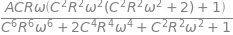

In [297]:
simplify(res[0])

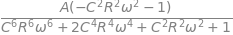

In [298]:
simplify(res[1])

In [299]:
simplify(res[2])

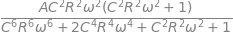

In [300]:
simplify(res[3])

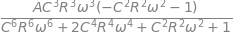

In [301]:
simplify(res[4])

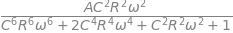

In [302]:
simplify(res[5])